In [41]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

#Reading Data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [42]:
#Collecting X and Y
X = data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [43]:
#Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of values
m= len(X)

#Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 =  numer / denom
b0 = mean_y - (b1 * mean_x)

#Print coefficients
print(b1,  b0)

0.26342933948939945 325.57342104944223


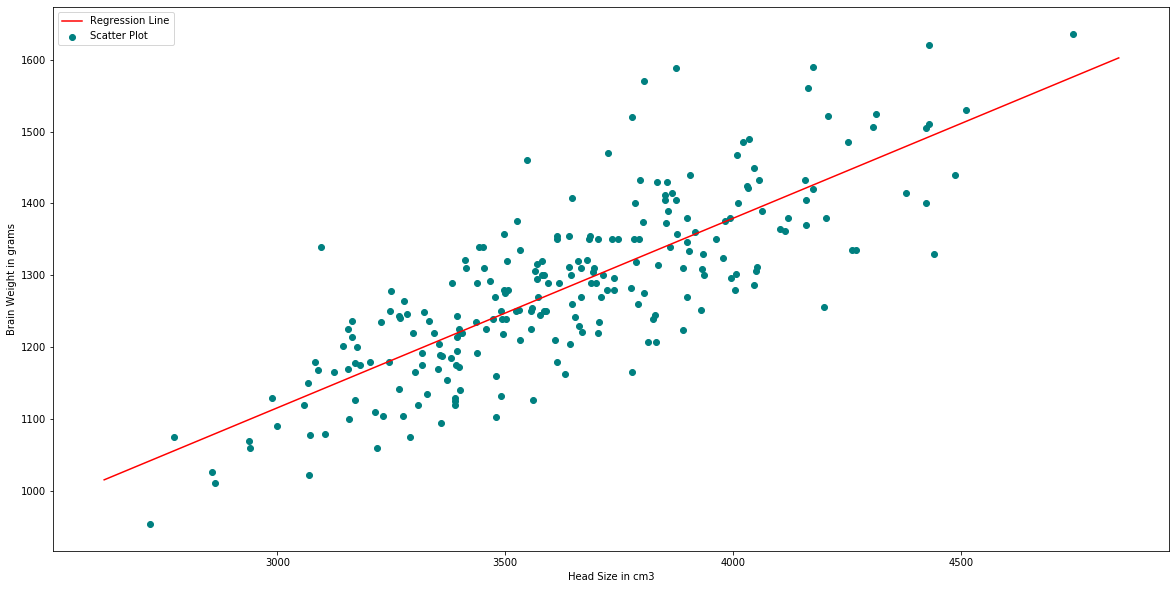

In [44]:
#plotting values and regression line
max_x = np.max(X) +100
min_x = np.min(X) - 100

#calculating line vlues x and y
x = np.linspace(min_x, max_x, 1000)
y=b0 + b1*x

#ploting line
plt.plot(x, y, color='red', label = 'Regression Line')

#ploting scatter points
plt.scatter(X,Y ,c='teal', label="Scatter Plot")

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [45]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t +=(Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) **2
r2 = 1-(ss_r/ss_t)
print(r2)

0.6393117199570003


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#cannot use rank 1 matrix in scikit learn
X = X.reshape((m ,1))

#creating model
reg = LinearRegression()

#fitting training data
reg = reg.fit(X,Y)

#Y prediction
Y_pred = reg.predict(X)

#calculating R2 score
r2_score = reg.score(X,  Y)

print(r2_score)

0.639311719957
